# Activation Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np_arr = np.arange(-6, 6, 0.01)

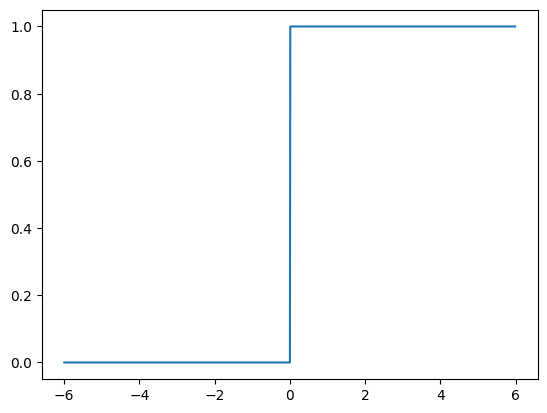

In [2]:
def threshold_function(x):
    y = x > 0
    return y.astype(int)


plt.plot(np_arr, threshold_function(np_arr))
plt.show()

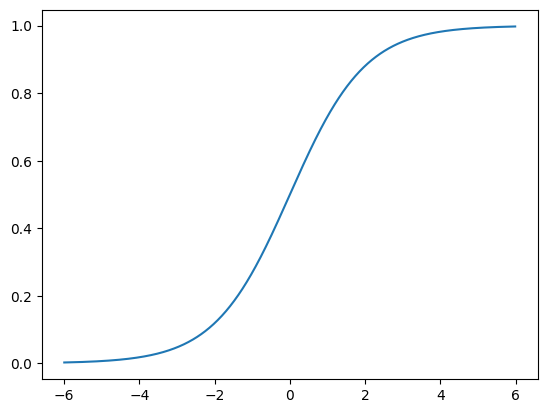

In [3]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))


plt.plot(np_arr, sigmoid_function(np_arr))
plt.show()

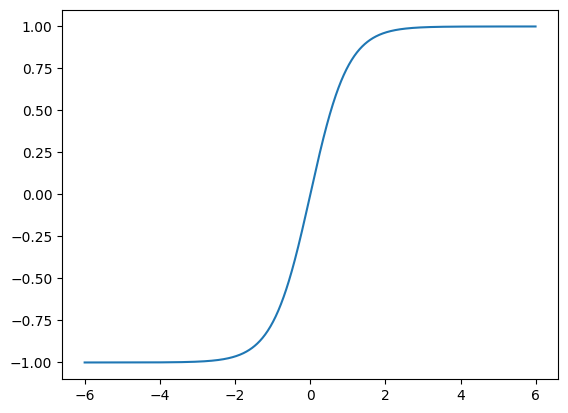

In [4]:
def tangent_function(x):
    return np.tanh(x)


plt.plot(np_arr, tangent_function(np_arr))
plt.show()

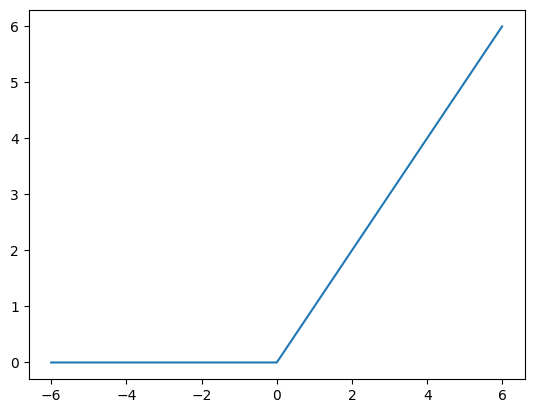

In [5]:
def relu_function(x):
    return np.maximum(0, x)


plt.plot(np_arr, relu_function(np_arr))
plt.show()

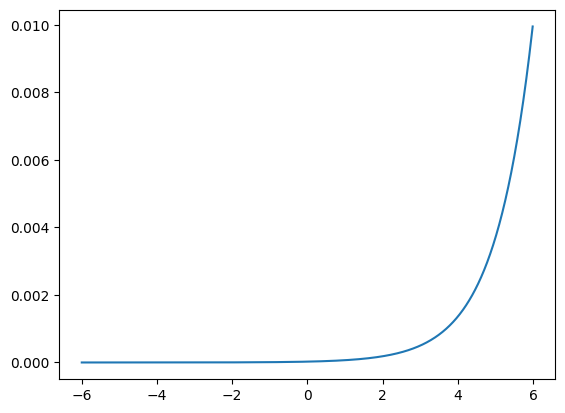

In [6]:
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))


plt.plot(np_arr, softmax_function(np_arr))
plt.show()

# Foward Propagation

In [7]:
network = {}
network["w1"] = np.array([np.random.rand(3), np.random.rand(3)])
network["b1"] = np.array(np.random.rand(3))
network["w2"] = np.array([np.random.rand(2), np.random.rand(2), np.random.rand(2)])
network["b2"] = np.array(np.random.rand(2))
network

{'w1': array([[0.92248122, 0.21765691, 0.79581154],
        [0.79792205, 0.89436343, 0.40788146]]),
 'b1': array([0.3324608 , 0.50727502, 0.26990669]),
 'w2': array([[0.43294222, 0.8569374 ],
        [0.63503972, 0.35746038],
        [0.5844541 , 0.24633747]]),
 'b2': array([0.21292633, 0.97030332])}

In [8]:
X = np.array([1, 0.5])  # input value
X

array([1. , 0.5])

In [9]:
a1 = np.dot(X, network["w1"]) + network["b1"]
a1

array([1.65390304, 1.17211365, 1.26965896])

In [10]:
z1 = sigmoid_function(a1)  # finished hidden layer caculate
z1

array([0.83941786, 0.76352686, 0.78068436])

In [11]:
z2 = np.dot(z1, network["w2"]) + network["b2"]  # output layer
y = sigmoid_function(z2)
y

array([0.82016855, 0.89612338])

# Loss function

In [12]:
def mean_square_error(y_hat, y):
    return 0.5 * np.sum((y_hat - y) ** 2)

In [13]:
def cross_entropy_err(y_hat, y):
    delta = 1e-8
    return -np.sum(y * np.log(y_hat + delta))

# differentiate to obtain the gradien

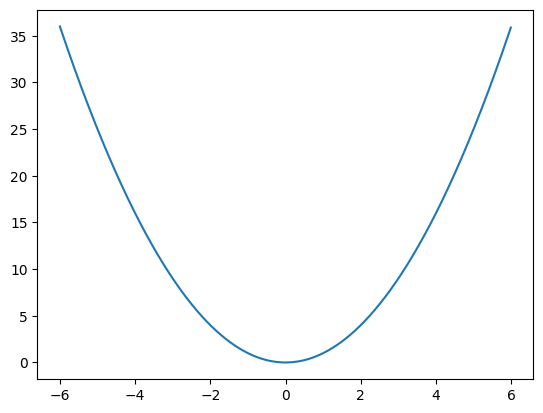

In [14]:
def func(x):
    return x**2


x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

In [15]:
# 取斜率
def dfunc(f, x):
    h = 1e-4
    return (f(x + h) - f(x)) / (h)

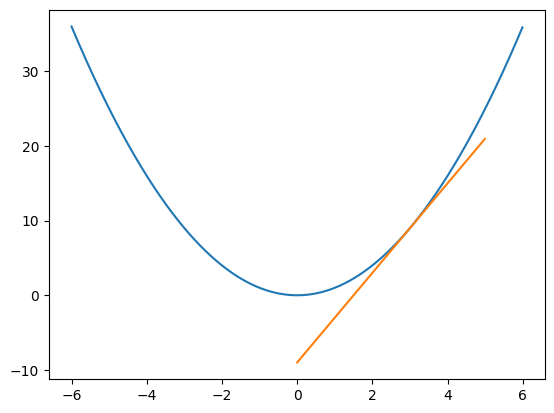

In [16]:
# 切線函數
def tfunc(f, x, t):
    d = dfunc(f, x)
    y = f(x) - d * x
    return d * t + y


# 畫出 x^2 函數
x = np.arange(-6, 6, 0.01)
y = func(x)
plt.plot(x, y)

# 畫出 x=3 時的切線 by 斜率
x2 = np.arange(0, 5, 0.01)
y2 = tfunc(func, 3, x2)
plt.plot(x2, y2)
plt.show()

In [38]:
def dfunc(f, x):
    h = 1e-4  # 微小變化量，避免除以 0 發生
    grad = np.zeros_like(x)  # 初始化一個和 x 形狀相同，但所有元素都為0的陣列，用於存放梯度值

    # np.nditer是一個迭代器，用於迭代陣列 x 的每個元素，並能夠追踪當前元素的索引
    it = np.nditer(x, flags=["multi_index"])

    while not it.finished:  # 繼續迭代直到所有元素都被訪問
        idx = it.multi_index  # 取得當前元素的索引
        tmp_val = x[idx]  # 暫存當前元素的值

        # 計算 f(x+h)
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # 計算 f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        # 計算梯度（中心差分方法）
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 恢復原始值
        it.iternext()  # 移動到下一個元素

    return grad  # 返回梯度陣列


np.array(3.0), dfunc(func, np.array(3.0))

(array(3.), array(6.))

# Gradient Descent

In [42]:
def gradient_descent(func, init_x, lr=0.3, epochs=100):
    x = init_x
    res = [x]
    for i in range(epochs):
        grad = dfunc(func, x)
        x = x - grad * lr
        res.append(x)

    return np.array(res)


def dfunc(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

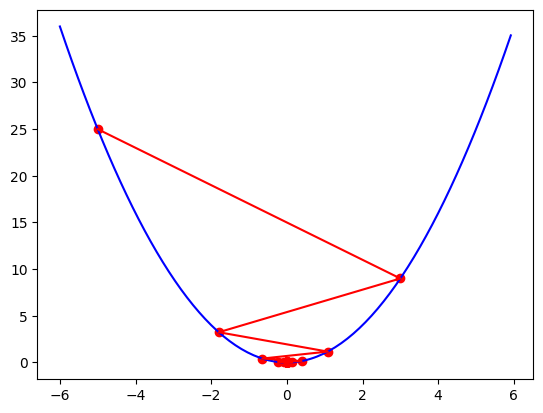

In [43]:
x = gradient_descent(func, -5, lr=0.8)
t = np.arange(-6.0, 6.0, 0.08)
plt.plot(t, func(t), c="b")
plt.plot(x, func(x), c="r")
plt.scatter(x, func(x), c="r")
plt.show()

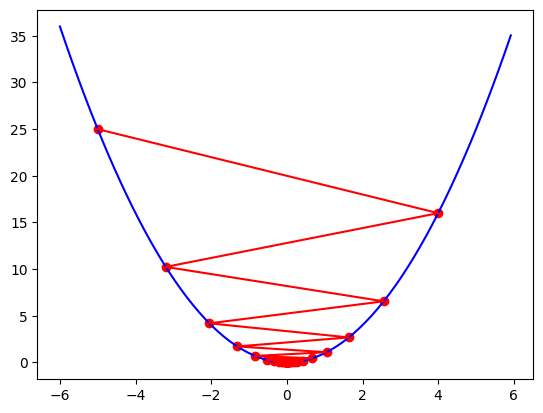

In [24]:
x = gradient_descent(func, -5, lr=0.9)
t = np.arange(-6.0, 6.0, 0.08)
plt.plot(t, func(t), c="b")
plt.plot(x, func(x), c="r")
plt.scatter(x, func(x), c="r")
plt.show()

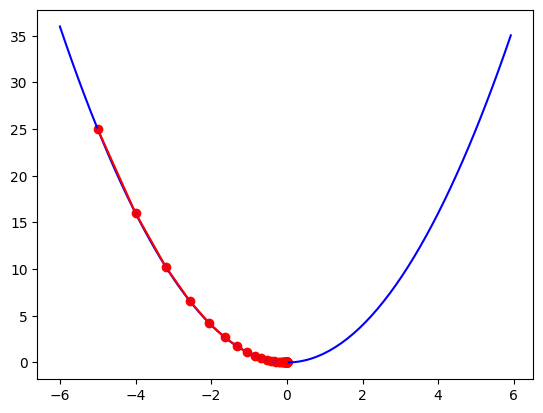

In [25]:
x = gradient_descent(func, -5, lr=0.1)
t = np.arange(-6.0, 6.0, 0.08)
plt.plot(t, func(t), c="b")
plt.plot(x, func(x), c="r")
plt.scatter(x, func(x), c="r")
plt.show()

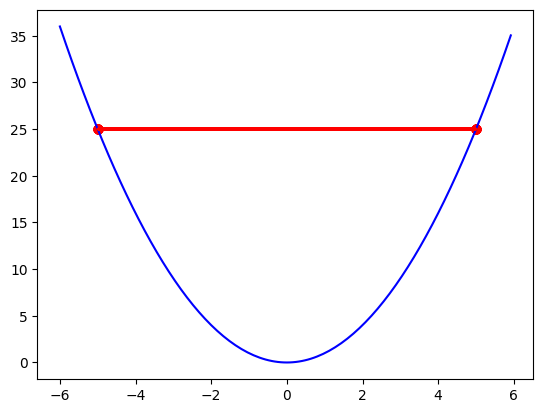

In [26]:
x = gradient_descent(func, -5, lr=1)
t = np.arange(-6.0, 6.0, 0.08)
plt.plot(t, func(t), c="b")
plt.plot(x, func(x), c="r")
plt.scatter(x, func(x), c="r")
plt.show()

# Steps of update weight

In [53]:
# 前向傳遞
x = np.array([0.6, 0.1])
np.random.seed(42)
weight = np.random.randn(2, 3)  # shape 2, 3 weight
z = np.dot(x, weight)
z

array([ 0.45033148, -0.10637392,  0.36519943])

In [54]:
weight

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696]])

In [55]:
# 激活函數
y_hat = softmax_function(z)
y_hat

array([0.40136704, 0.23002107, 0.36861188])

In [67]:
# 計算損失
def predict(x):
    return np.dot(x, weight)


def loss(x, y):
    z = predict(x)
    y_hat = softmax_function(z)
    loss = cross_entropy_err(y_hat, y)
    return loss


y = np.array([1, 0, 0])  # 假設答案
func = lambda w: loss(x, y)

In [68]:
# 修正權重
def dfunc(f, x):
    h = 1e-4  # 微小變化量，避免除以 0 發生
    grad = np.zeros_like(x)  # 初始化一個和 x 形狀相同，但所有元素都為0的陣列，用於存放梯度值

    # np.nditer是一個迭代器，用於迭代陣列 x 的每個元素，並能夠追踪當前元素的索引
    it = np.nditer(x, flags=["multi_index"])

    while not it.finished:  # 繼續迭代直到所有元素都被訪問
        idx = it.multi_index  # 取得當前元素的索引
        tmp_val = x[idx]  # 暫存當前元素的值

        # 計算 f(x+h)
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # 計算 f(x-h)
        x[idx] = tmp_val - h
        fxh2 = f(x)

        # 計算梯度（中心差分方法）
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 恢復原始值
        it.iternext()  # 移動到下一個元素

    return grad  # 返回梯度陣列


dfunc(func, weight)  # 新權重

array([[-0.35917976,  0.13801264,  0.22116712],
       [-0.05986329,  0.02300211,  0.03686119]])

# 建立神經網路

In [69]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid_function(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax_function(a2)
        return y

    def loss(self, x, y):
        y_hat = self.predict(x)
        return cross_entropy_err(y_hat, y)

    def numerical_gradient(self, x, y):
        loss_W = lambda W: self.loss(x, y)
        grads = {}
        grads["W1"] = dfunc(loss_W, self.params["W1"])
        grads["b1"] = dfunc(loss_W, self.params["b1"])
        grads["W2"] = dfunc(loss_W, self.params["W2"])
        grads["b2"] = dfunc(loss_W, self.params["b2"])
        return grads

In [70]:
net = ANN(input_size=4, hidden_size=5, output_size=3)

In [71]:
net.params["W1"]

array([[ 0.01579213,  0.00767435, -0.00469474,  0.0054256 , -0.00463418],
       [-0.0046573 ,  0.00241962, -0.0191328 , -0.01724918, -0.00562288],
       [-0.01012831,  0.00314247, -0.00908024, -0.01412304,  0.01465649],
       [-0.00225776,  0.00067528, -0.01424748, -0.00544383,  0.00110923]])

In [72]:
net.params["W2"]

array([[-0.01150994,  0.00375698, -0.00600639],
       [-0.00291694, -0.00601707,  0.01852278],
       [-0.00013497, -0.01057711,  0.00822545],
       [-0.01220844,  0.00208864, -0.0195967 ],
       [-0.01328186,  0.00196861,  0.00738467]])

In [73]:
net.params["b1"]

array([0., 0., 0., 0., 0.])

In [74]:
net.params["b2"]

array([0., 0., 0.])

In [77]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [88]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [91]:
y = np.zeros((len(iris.target), 3))  # shape (len(y), 3)
for idx, val in enumerate(iris.target):
    y[idx, val] = 1
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [87]:
y.shape

(150, 3)

In [101]:
predicted_y = net.predict(x)
result = np.zeros_like(predicted_y)
result[np.arange(result.shape[0]), np.argmax(predicted_y, axis=1)] = 1
result

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [104]:
from sklearn.metrics import accuracy_score


accuracy_score(y, result)  # 正確率

0.3333333333333333

In [105]:
import time

a = time.time()
epochs = 3000
lr = 0.01

train_loss = []
for i in range(epochs):
    grad = net.numerical_gradient(x, y)
    for key in ("W1", "b1", "W2", "b2"):
        net.params[key] = net.params[key] - lr * grad[key]
    loss = net.loss(x, y)
    train_loss.append(loss)
time.time() - a

25.534290313720703

In [106]:
predicted_y = net.predict(x)
result = np.zeros_like(predicted_y)
result[np.arange(result.shape[0]), np.argmax(predicted_y, axis=1)] = 1
result

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [107]:
accuracy_score(y, result)

0.98